# Libraries 

In [1]:
# trio!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import timeit

# ML
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Import Train/Test Set

This time we use sampling to reduce training time.

In [2]:
df_train = pd.read_csv('train.csv').sample(10000, random_state=2021)
df_test = pd.read_csv('test.csv').sample(3000, random_state=2021)

In [3]:
features_list = ['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed', 'i_d', 'i_q']
target = 'stator_yoke'

In [4]:
X_train = df_train[features_list].to_numpy()
y_train = df_train[target].to_numpy()

In [5]:
X_train.shape, y_train.shape

((10000, 7), (10000,))

In [6]:
X_test = df_test[features_list].to_numpy()
y_test = df_test[target].to_numpy()

In [7]:
X_test.shape, y_test.shape

((3000, 7), (3000,))

# Data Preprocessing

In [8]:
X_scaler = MinMaxScaler()

In [9]:
X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

#  Predictive Models

In [10]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [11]:
def plot_test(reg, X, y):
    y_pred = reg.predict(X)
    plt.scatter(y, y_pred)
    rmse = mean_squared_error(y, y_pred, squared=False)
    print(f'RMSE: {rmse}')

## Ridge 

In [12]:
from sklearn.linear_model import Ridge

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [13]:
param_grid_ridge = {
    "alpha": [0.01, 0.2, 0.4, 0.6, 0.8, 1],
    "solver": ["cholesky", "saga"]
}

### Grid Search

In [14]:
grid_search_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=5, n_jobs=-1)

In [15]:
%timeit grid_search_ridge.fit(X_train_scaled, y_train)

82.2 ms ± 3.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
grid_search_ridge.best_params_

{'alpha': 0.01, 'solver': 'saga'}

In [17]:
grid_search_ridge.cv_results_

{'mean_fit_time': array([0.00180364, 0.01419735, 0.00189962, 0.0124002 , 0.00149956,
        0.01289973, 0.0013999 , 0.0124001 , 0.00150065, 0.01219921,
        0.00189981, 0.01180024]),
 'std_fit_time': array([0.00024967, 0.00075067, 0.00019927, 0.00120006, 0.00031613,
        0.00058366, 0.00037369, 0.00096984, 0.00044772, 0.00159969,
        0.00037419, 0.00081244]),
 'mean_score_time': array([0.00040011, 0.00050535, 0.00060019, 0.00050077, 0.00050006,
        0.00050092, 0.00030003, 0.0004003 , 0.00040011, 0.00050092,
        0.00019999, 0.00030255]),
 'std_score_time': array([2.00381952e-04, 1.06598437e-05, 1.99985959e-04, 9.48893964e-07,
        3.23406696e-07, 3.01578299e-07, 2.44970216e-04, 2.00153441e-04,
        2.00059608e-04, 1.18731495e-06, 2.44931638e-04, 2.47066353e-04]),
 'param_alpha': masked_array(data=[0.01, 0.01, 0.2, 0.2, 0.4, 0.4, 0.6, 0.6, 0.8, 0.8, 1,
                    1],
              mask=[False, False, False, False, False, False, False, False,
            

In [18]:
df_grid_search_ridge = pd.DataFrame(grid_search_ridge.cv_results_)
df_grid_search_ridge.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001804,0.000250,0.000400,2.003820e-04,0.01,cholesky,"{'alpha': 0.01, 'solver': 'cholesky'}",0.842593,0.845733,0.832234,0.849496,0.850215,0.844054,0.006515,5
1,0.014197,0.000751,0.000505,1.065984e-05,0.01,saga,"{'alpha': 0.01, 'solver': 'saga'}",0.842586,0.845733,0.832241,0.849492,0.850233,0.844057,0.006516,1
2,0.001900,0.000199,0.000600,1.999860e-04,0.2,cholesky,"{'alpha': 0.2, 'solver': 'cholesky'}",0.842599,0.845727,0.832237,0.849499,0.850211,0.844055,0.006513,2
3,0.012400,0.001200,0.000501,9.488940e-07,0.2,saga,"{'alpha': 0.2, 'solver': 'saga'}",0.842593,0.845718,0.832235,0.849510,0.850216,0.844054,0.006516,4
4,0.001500,0.000316,0.000500,3.234067e-07,0.4,cholesky,"{'alpha': 0.4, 'solver': 'cholesky'}",0.842604,0.845720,0.832239,0.849503,0.850207,0.844055,0.006512,3


In [19]:
df_grid_search_ridge.sort_values(["param_solver", "param_alpha", "mean_test_score"], inplace=True)

<AxesSubplot:xlabel='param_alpha', ylabel='mean_test_score'>

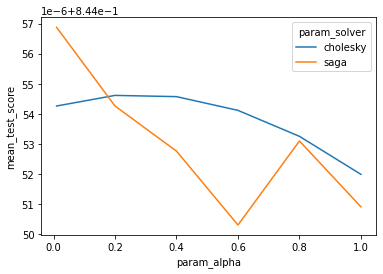

In [20]:
sns.lineplot(x="param_alpha", y="mean_test_score", hue="param_solver", data=df_grid_search_ridge)

In [21]:
grid_search_ridge.score(X_test_scaled, y_test)

0.833076742409584

RMSE: 0.3862999261057888


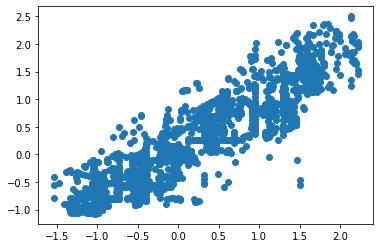

In [22]:
plot_test(grid_search_ridge, X_test_scaled, y_test)

### Randomized Search

In [23]:
rand_search_ridge = RandomizedSearchCV(Ridge(), param_grid_ridge, cv=5, n_jobs=-1)

In [24]:
%timeit rand_search_ridge.fit(X_train_scaled, y_train)

69.6 ms ± 1.83 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [25]:
rand_search_ridge.best_params_

{'solver': 'saga', 'alpha': 0.2}

In [26]:
rand_search_ridge.cv_results_

{'mean_fit_time': array([0.00150027, 0.00129995, 0.01339989, 0.01389656, 0.00170064,
        0.00119867, 0.00139985, 0.00959787, 0.00139832, 0.01010256]),
 'std_fit_time': array([0.00031651, 0.00024507, 0.00086055, 0.00158596, 0.00040031,
        0.00024586, 0.00019996, 0.00152849, 0.00037617, 0.00127546]),
 'mean_score_time': array([0.00030007, 0.00030031, 0.00050039, 0.00059977, 0.00040026,
        0.00030141, 0.00040379, 0.00039983, 0.00038414, 0.0001966 ]),
 'std_score_time': array([2.45010031e-04, 2.45205162e-04, 2.78041453e-07, 2.00081213e-04,
        5.83429104e-04, 2.46111747e-04, 2.01933561e-04, 1.99914171e-04,
        1.94501193e-04, 2.40834659e-04]),
 'param_solver': masked_array(data=['cholesky', 'cholesky', 'saga', 'saga', 'cholesky',
                    'cholesky', 'cholesky', 'saga', 'cholesky', 'saga'],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'para

In [27]:
df_rand_search_ridge = pd.DataFrame(rand_search_ridge.cv_results_)
df_rand_search_ridge.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_solver,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001500,0.000317,0.0003,2.450100e-04,cholesky,0.6,"{'solver': 'cholesky', 'alpha': 0.6}",0.842608,0.845713,0.832241,0.849506,0.850203,0.844054,0.006510,5
1,0.001300,0.000245,0.0003,2.452052e-04,cholesky,0.4,"{'solver': 'cholesky', 'alpha': 0.4}",0.842604,0.845720,0.832239,0.849503,0.850207,0.844055,0.006512,3
2,0.013400,0.000861,0.0005,2.780415e-07,saga,0.2,"{'solver': 'saga', 'alpha': 0.2}",0.842602,0.845725,0.832235,0.849511,0.850229,0.844060,0.006519,1
3,0.013897,0.001586,0.0006,2.000812e-04,saga,0.01,"{'solver': 'saga', 'alpha': 0.01}",0.842592,0.845741,0.832239,0.849485,0.850205,0.844052,0.006510,7
4,0.001701,0.000400,0.0004,5.834291e-04,cholesky,0.2,"{'solver': 'cholesky', 'alpha': 0.2}",0.842599,0.845727,0.832237,0.849499,0.850211,0.844055,0.006513,2


In [28]:
df_rand_search_ridge.sort_values(["param_solver", "param_alpha", "mean_test_score"], inplace=True)

<AxesSubplot:xlabel='param_alpha', ylabel='mean_test_score'>

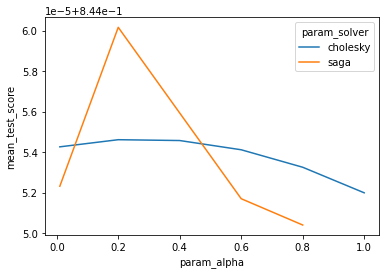

In [29]:
sns.lineplot(x="param_alpha", y="mean_test_score", hue="param_solver", data=df_rand_search_ridge)

In [30]:
rand_search_ridge.score(X_test_scaled, y_test)

0.833041235569606

RMSE: 0.38634100953695677


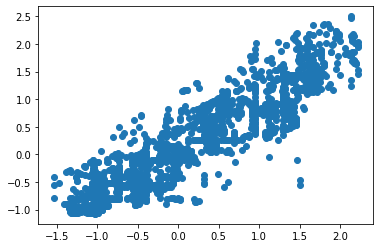

In [31]:
plot_test(rand_search_ridge, X_test_scaled, y_test)

## Lasso

In [32]:
from sklearn.linear_model import Lasso

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [33]:
param_grid_lasso = {
    "alpha": [0.01, 0.2, 0.4, 0.6, 0.8, 1]
}

In [34]:
grid_search_lasso = GridSearchCV(Lasso(), param_grid=param_grid_lasso, cv=5, n_jobs=-1)

In [35]:
grid_search_lasso.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.2, 0.4, 0.6, 0.8, 1]})

In [36]:
grid_search_lasso.best_params_

{'alpha': 0.01}

In [37]:
grid_search_lasso.cv_results_

{'mean_fit_time': array([0.00189977, 0.00140057, 0.00170093, 0.00149927, 0.00130095,
        0.00096698]),
 'std_fit_time': array([0.0002003 , 0.00020139, 0.00051025, 0.00031681, 0.00039883,
        0.00031821]),
 'mean_score_time': array([0.00030208, 0.00039802, 0.00040026, 0.0001996 , 0.00039983,
        0.00039907]),
 'std_score_time': array([0.00024668, 0.00019904, 0.00020013, 0.00024446, 0.00019992,
        0.00019954]),
 'param_alpha': masked_array(data=[0.01, 0.2, 0.4, 0.6, 0.8, 1],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.01},
  {'alpha': 0.2},
  {'alpha': 0.4},
  {'alpha': 0.6},
  {'alpha': 0.8},
  {'alpha': 1}],
 'split0_test_score': array([ 8.31758611e-01,  1.99375939e-01, -1.58310342e-05, -1.58310342e-05,
        -1.58310342e-05, -1.58310342e-05]),
 'split1_test_score': array([ 0.83686056,  0.20393506, -0.00144456, -0.00144456, -0.00144456,
        -0.00144456]),
 'split2_test_

In [38]:
df_grid_search_lasso = pd.DataFrame(grid_search_lasso.cv_results_)
df_grid_search_lasso.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001900,0.000200,0.000302,0.000247,0.01,{'alpha': 0.01},0.831759,0.836861,0.825038,0.843773,0.845184,0.836523,0.007514,1
1,0.001401,0.000201,0.000398,0.000199,0.2,{'alpha': 0.2},0.199376,0.203935,0.213555,0.207348,0.203508,0.205544,0.004737,2
2,0.001701,0.000510,0.000400,0.000200,0.4,{'alpha': 0.4},-0.000016,-0.001445,-0.001739,-0.000004,-0.000001,-0.000641,0.000782,3
3,0.001499,0.000317,0.000200,0.000244,0.6,{'alpha': 0.6},-0.000016,-0.001445,-0.001739,-0.000004,-0.000001,-0.000641,0.000782,3
4,0.001301,0.000399,0.000400,0.000200,0.8,{'alpha': 0.8},-0.000016,-0.001445,-0.001739,-0.000004,-0.000001,-0.000641,0.000782,3


In [39]:
df_grid_search_lasso.sort_values(["param_alpha", "mean_test_score"], inplace=True)

<AxesSubplot:xlabel='param_alpha', ylabel='mean_test_score'>

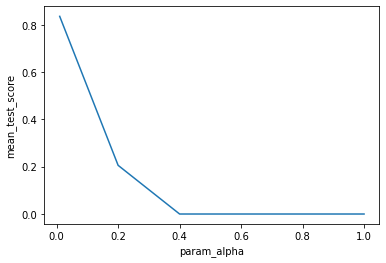

In [40]:
sns.lineplot(x="param_alpha", y="mean_test_score", data=df_grid_search_lasso)

In [41]:
grid_search_lasso.score(X_test_scaled, y_test)

0.8262217629318773

RMSE: 0.3941521436079015


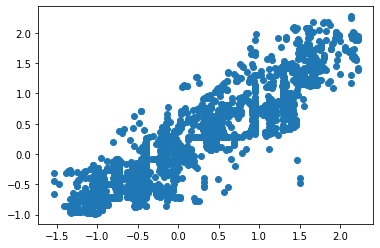

In [42]:
plot_test(grid_search_lasso, X_test_scaled, y_test)

## Decision Tree Regressor 

In [43]:
from sklearn.tree import DecisionTreeRegressor

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [44]:
param_grid_dt_reg = {
    "max_depth": [5, 7, 10, 15, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 10, 20],
}

In [45]:
grid_search_dt_reg = GridSearchCV(DecisionTreeRegressor(), param_grid_dt_reg, cv=5, n_jobs=-1)

In [46]:
grid_search_dt_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 7, 10, 15, 30],
                         'min_samples_leaf': [1, 10, 20],
                         'min_samples_split': [2, 5, 10]})

In [47]:
grid_search_dt_reg.best_params_

{'max_depth': 30, 'min_samples_leaf': 10, 'min_samples_split': 10}

In [48]:
grid_search_dt_reg.cv_results_

{'mean_fit_time': array([0.02379827, 0.02299809, 0.02259917, 0.02229972, 0.02330012,
        0.02360005, 0.0236999 , 0.0229003 , 0.02329965, 0.03029861,
        0.03059907, 0.03080006, 0.02989998, 0.03140035, 0.02949963,
        0.03200006, 0.0297997 , 0.03078876, 0.0400001 , 0.03869991,
        0.03890004, 0.03769894, 0.03749981, 0.03750019, 0.03599949,
        0.03559918, 0.03459983, 0.05530005, 0.05069976, 0.04859943,
        0.04119935, 0.04229941, 0.04150038, 0.03699989, 0.03749986,
        0.03669963, 0.06200018, 0.05689974, 0.06530032, 0.04400001,
        0.04279461, 0.04710059, 0.03840008, 0.03789945, 0.03539982]),
 'std_fit_time': array([0.00102912, 0.00077439, 0.0003738 , 0.00024427, 0.00081311,
        0.00177109, 0.00136364, 0.00037511, 0.00040022, 0.00169106,
        0.00156135, 0.00239964, 0.001828  , 0.00332323, 0.00054725,
        0.00376798, 0.0011227 , 0.00238411, 0.0010493 , 0.00024515,
        0.00037389, 0.00067783, 0.00122501, 0.00126514, 0.00130424,
        0.001

In [49]:
df_grid_search_dt_reg = pd.DataFrame(grid_search_dt_reg.cv_results_)
df_grid_search_dt_reg.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.023798,0.001029,0.000600,2.000333e-04,5,1,2,"{'max_depth': 5, 'min_samples_leaf': 1, 'min_s...",0.865384,0.859384,0.850290,0.862312,0.869908,0.861456,0.006581,40
1,0.022998,0.000774,0.000800,2.452828e-04,5,1,5,"{'max_depth': 5, 'min_samples_leaf': 1, 'min_s...",0.865384,0.859384,0.850290,0.862312,0.869908,0.861456,0.006581,40
2,0.022599,0.000374,0.000600,1.996525e-04,5,1,10,"{'max_depth': 5, 'min_samples_leaf': 1, 'min_s...",0.865384,0.859384,0.850290,0.862312,0.869908,0.861456,0.006581,40
3,0.022300,0.000244,0.000500,4.768372e-07,5,10,2,"{'max_depth': 5, 'min_samples_leaf': 10, 'min_...",0.864616,0.859098,0.849729,0.866938,0.869986,0.862074,0.007127,37
4,0.023300,0.000813,0.000701,2.453208e-04,5,10,5,"{'max_depth': 5, 'min_samples_leaf': 10, 'min_...",0.864616,0.859098,0.849729,0.866938,0.869986,0.862074,0.007127,37


In [50]:
df_grid_search_dt_reg.sort_values(["param_max_depth", "param_min_samples_leaf", "param_min_samples_split", "mean_test_score"], inplace=True)

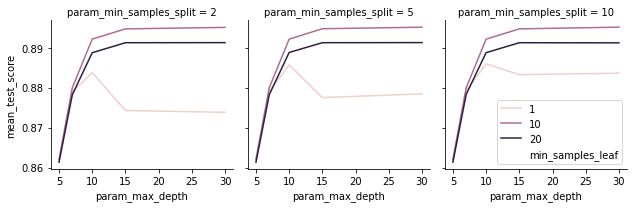

In [51]:
fig_dt_reg = sns.FacetGrid(df_grid_search_dt_reg, col="param_min_samples_split")
fig_dt_reg.map(sns.lineplot, "param_max_depth", "mean_test_score", "param_min_samples_leaf")
plt.plot([], [], ' ', label="min_samples_leaf")
plt.legend()
plt.show()

In [52]:
grid_search_dt_reg.score(X_test, y_test)

0.6620990074762222

RMSE: 0.5496179817190734


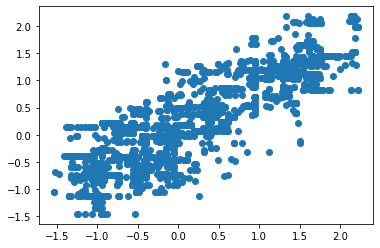

In [53]:
plot_test(grid_search_dt_reg, X_test, y_test)

## Random Forest Regressor

In [54]:
from sklearn.ensemble import RandomForestRegressor

In [55]:
param_grid_rf_reg = {
    "max_depth": [5, 7, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 10, 20],
}

In [56]:
grid_search_rf_reg = GridSearchCV(RandomForestRegressor(), param_grid_rf_reg, cv=5, n_jobs=-1)

In [57]:
grid_search_rf_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 7, 10, 20],
                         'min_samples_leaf': [1, 10, 20],
                         'min_samples_split': [2, 5, 10]})

In [58]:
grid_search_rf_reg.best_params_

{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [59]:
grid_search_rf_reg.cv_results_

{'mean_fit_time': array([1.52249899, 1.53209825, 1.53569736, 1.5067996 , 1.5681942 ,
        1.54659915, 1.57989964, 1.52890711, 1.55839996, 2.01799946,
        2.00869927, 2.0527997 , 1.94060082, 2.1208992 , 1.98769984,
        1.91119967, 1.89979916, 1.88979859, 2.66119781, 2.57790027,
        2.66849451, 2.45129962, 2.41109934, 2.38370028, 2.21929998,
        2.30339675, 2.18279839, 3.9271997 , 3.53239608, 3.64110012,
        2.62729988, 2.6968997 , 2.75669966, 2.38369927, 2.11059999,
        1.94909968]),
 'std_fit_time': array([0.02536309, 0.04107507, 0.04458161, 0.01854099, 0.03947243,
        0.02118941, 0.05891301, 0.03229336, 0.0611651 , 0.04360572,
        0.08234512, 0.07918685, 0.02771039, 0.13438627, 0.11665007,
        0.02191706, 0.02322437, 0.02676651, 0.07993766, 0.04875155,
        0.10888386, 0.09166779, 0.08167632, 0.07327634, 0.09006798,
        0.09921319, 0.06752358, 0.22475762, 0.10645657, 0.14508097,
        0.0806045 , 0.14424309, 0.12538206, 0.12701586, 0.105

In [60]:
df_grid_search_rf_reg = pd.DataFrame(grid_search_rf_reg.cv_results_)
df_grid_search_rf_reg.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.522499,0.025363,0.0133,0.000510,5,1,2,"{'max_depth': 5, 'min_samples_leaf': 1, 'min_s...",0.874417,0.870907,0.862725,0.878743,0.877836,0.872925,0.005802,32
1,1.532098,0.041075,0.0138,0.000678,5,1,5,"{'max_depth': 5, 'min_samples_leaf': 1, 'min_s...",0.874086,0.871270,0.863133,0.878408,0.878472,0.873074,0.005669,29
2,1.535697,0.044582,0.0152,0.002462,5,1,10,"{'max_depth': 5, 'min_samples_leaf': 1, 'min_s...",0.874063,0.871172,0.862639,0.878865,0.878626,0.873073,0.005964,30
3,1.506800,0.018541,0.0137,0.000245,5,10,2,"{'max_depth': 5, 'min_samples_leaf': 10, 'min_...",0.874602,0.871141,0.861390,0.880141,0.878347,0.873124,0.006638,28
4,1.568194,0.039472,0.0174,0.004164,5,10,5,"{'max_depth': 5, 'min_samples_leaf': 10, 'min_...",0.874109,0.871207,0.862135,0.879089,0.877973,0.872903,0.006070,33


In [61]:
df_grid_search_rf_reg.sort_values(["param_max_depth", "param_min_samples_leaf", "param_min_samples_split", "mean_test_score"], inplace=True)

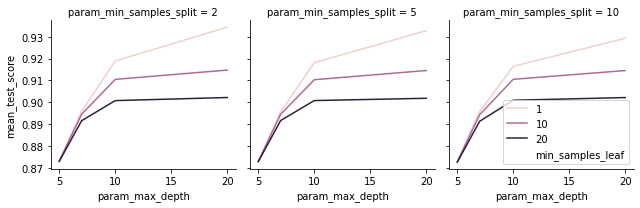

In [62]:
fig_rf_reg = sns.FacetGrid(df_grid_search_rf_reg, col="param_min_samples_split")
fig_rf_reg.map(sns.lineplot, "param_max_depth", "mean_test_score", "param_min_samples_leaf")
plt.plot([], [], ' ', label="min_samples_leaf")
plt.legend()
plt.show()

In [63]:
grid_search_rf_reg.score(X_test, y_test)

0.7517875459417157

RMSE: 0.47106190438292866


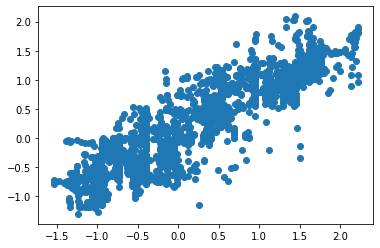

In [64]:
plot_test(grid_search_rf_reg, X_test, y_test)

## AdaBoost Regressor

In [65]:
from sklearn.ensemble import AdaBoostRegressor

In [66]:
param_grid_adb_reg = {
    'n_estimators': [50, 100],
    'learning_rate' : [0.01, 0.2, 0.5, 1],
    'loss' : ['linear', 'square', 'exponential']
 }

In [67]:
grid_search_adb_reg = GridSearchCV(AdaBoostRegressor(), param_grid_adb_reg, cv=5, n_jobs=-1)

In [68]:
grid_search_adb_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.2, 0.5, 1],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 100]})

In [69]:
grid_search_adb_reg.best_params_

{'learning_rate': 0.2, 'loss': 'exponential', 'n_estimators': 50}

In [70]:
grid_search_adb_reg.cv_results_

{'mean_fit_time': array([0.79000072, 1.60368714, 0.78950281, 1.60140004, 0.80910158,
        1.60040021, 0.72939982, 1.32300062, 0.6767983 , 1.13419733,
        0.75730028, 1.36140347, 0.64239783, 0.87599902, 0.53370037,
        0.89099236, 0.64870377, 1.10429969, 0.43000445, 0.54439979,
        0.44459896, 0.77970409, 0.5526001 , 0.72659936]),
 'std_fit_time': array([0.0057806 , 0.01062892, 0.00540361, 0.03070403, 0.01897477,
        0.01780312, 0.00480968, 0.00983948, 0.00381611, 0.0179889 ,
        0.01224252, 0.01740368, 0.01461027, 0.14136623, 0.00715934,
        0.00999132, 0.0021077 , 0.0136008 , 0.04221984, 0.19753602,
        0.00608613, 0.02425182, 0.00609359, 0.08193954]),
 'mean_score_time': array([0.00959864, 0.02060065, 0.00959802, 0.01950207, 0.01290064,
        0.01990018, 0.01050043, 0.02180057, 0.01030045, 0.02159982,
        0.01010022, 0.02229671, 0.01060109, 0.01610327, 0.01200061,
        0.02229395, 0.01089611, 0.02329946, 0.00749507, 0.01080055,
        0.011200

In [71]:
df_grid_search_adb_reg = pd.DataFrame(grid_search_adb_reg.cv_results_)
df_grid_search_adb_reg.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_loss,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.790001,0.005781,0.009599,0.000201,0.01,linear,50,"{'learning_rate': 0.01, 'loss': 'linear', 'n_e...",0.821261,0.809017,0.808481,0.809726,0.822005,0.814098,0.006169,6
1,1.603687,0.010629,0.020601,0.001773,0.01,linear,100,"{'learning_rate': 0.01, 'loss': 'linear', 'n_e...",0.824199,0.817983,0.816359,0.810755,0.822779,0.818415,0.004808,2
2,0.789503,0.005404,0.009598,0.000491,0.01,square,50,"{'learning_rate': 0.01, 'loss': 'square', 'n_e...",0.820527,0.810019,0.808196,0.809071,0.821404,0.813843,0.005850,8
3,1.601400,0.030704,0.019502,0.001270,0.01,square,100,"{'learning_rate': 0.01, 'loss': 'square', 'n_e...",0.824198,0.810161,0.801991,0.812852,0.822681,0.814377,0.008233,5
4,0.809102,0.018975,0.012901,0.003878,0.01,exponential,50,"{'learning_rate': 0.01, 'loss': 'exponential',...",0.821026,0.808861,0.799518,0.807770,0.821363,0.811708,0.008394,9


In [72]:
df_grid_search_adb_reg.sort_values(["param_loss", "param_learning_rate", "param_n_estimators", "mean_test_score"], inplace=True)

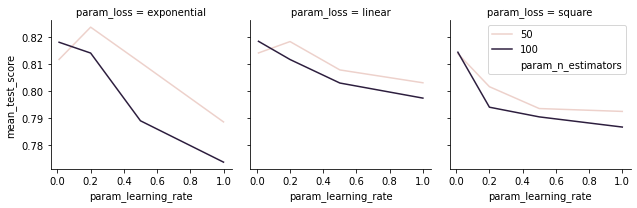

In [73]:
fig_adb_reg = sns.FacetGrid(df_grid_search_adb_reg, col="param_loss")
fig_adb_reg.map(sns.lineplot, "param_learning_rate", "mean_test_score", "param_n_estimators")
plt.plot([], [], ' ', label="param_n_estimators")
plt.legend()
plt.show()

In [74]:
grid_search_adb_reg.score(X_test, y_test)

0.6845350179683014

RMSE: 0.5310577830380606


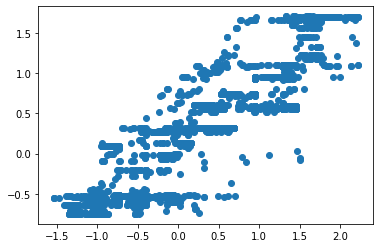

In [75]:
plot_test(grid_search_adb_reg, X_test, y_test)

## Gradient Boosting Regressor 

In [76]:
from sklearn.ensemble import GradientBoostingRegressor

In [77]:
param_grid_gb_reg = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [5, 7, 10]
}

In [78]:
grid_search_gb_reg = GridSearchCV(GradientBoostingRegressor(), param_grid_gb_reg, cv=5, n_jobs=-1)

In [79]:
grid_search_gb_reg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'max_depth': [5, 7, 10],
                         'n_estimators': [50, 100, 200, 500]})

In [80]:
grid_search_gb_reg.best_params_

{'max_depth': 10, 'n_estimators': 500}

In [81]:
grid_search_gb_reg.cv_results_

{'mean_fit_time': array([ 1.26369672,  2.66749864,  5.33839998, 13.44509912,  1.67019296,
         3.57749224,  7.13569765, 17.74539943,  2.16529894,  4.55579867,
         9.72470026, 20.44989977]),
 'std_fit_time': array([0.04889008, 0.14653241, 0.11209539, 0.34441737, 0.06999218,
        0.21369128, 0.33493979, 0.27030723, 0.07661394, 0.03829249,
        0.12207987, 0.73474261]),
 'mean_score_time': array([0.0027    , 0.00410004, 0.00689974, 0.01479993, 0.00389986,
        0.00600028, 0.00999985, 0.02200041, 0.00809941, 0.00980024,
        0.01540003, 0.02349977]),
 'std_score_time': array([0.00024526, 0.00019994, 0.0003742 , 0.00024478, 0.00020006,
        0.00054803, 0.00077485, 0.00572699, 0.0027089 , 0.00024493,
        0.00066345, 0.00031628]),
 'param_max_depth': masked_array(data=[5, 5, 5, 5, 7, 7, 7, 7, 10, 10, 10, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
         

In [82]:
df_grid_search_gb_reg = pd.DataFrame(grid_search_gb_reg.cv_results_)
df_grid_search_gb_reg.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.263697,0.048890,0.0027,0.000245,5,50,"{'max_depth': 5, 'n_estimators': 50}",0.899902,0.896821,0.890223,0.902039,0.903520,0.898501,0.004712,12
1,2.667499,0.146532,0.0041,0.000200,5,100,"{'max_depth': 5, 'n_estimators': 100}",0.908609,0.903761,0.898985,0.907384,0.910769,0.905902,0.004139,11
2,5.338400,0.112095,0.0069,0.000374,5,200,"{'max_depth': 5, 'n_estimators': 200}",0.916438,0.911241,0.908658,0.913720,0.921193,0.914250,0.004327,10
3,13.445099,0.344417,0.0148,0.000245,5,500,"{'max_depth': 5, 'n_estimators': 500}",0.924853,0.918900,0.918747,0.921477,0.929650,0.922725,0.004111,7
4,1.670193,0.069992,0.0039,0.000200,7,50,"{'max_depth': 7, 'n_estimators': 50}",0.919016,0.913036,0.912084,0.915165,0.924143,0.916689,0.004424,9


In [83]:
df_grid_search_gb_reg.sort_values(["param_max_depth", "param_n_estimators", "mean_test_score"], inplace=True)

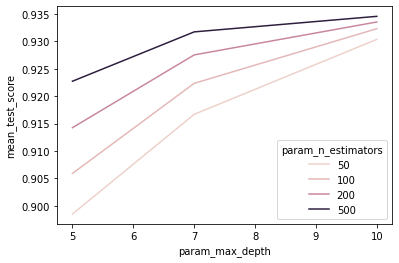

In [84]:
sns.lineplot(x="param_max_depth", y="mean_test_score", hue="param_n_estimators", data=df_grid_search_gb_reg);

In [85]:
grid_search_gb_reg.score(X_test, y_test)

0.76879138448159

RMSE: 0.45464058917702005


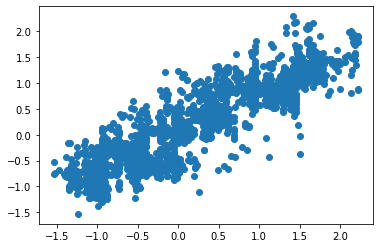

In [86]:
plot_test(grid_search_gb_reg, X_test, y_test)

## XGBoost Regressor

In [87]:
from xgboost import XGBRegressor

In [88]:
param_grid_xgb_reg = {
    'min_child_weight': [1, 5, 10],
    'subsample': [0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5]
}

In [89]:
grid_search_xgb_reg = GridSearchCV(XGBRegressor(), param_grid_xgb_reg, cv=5, n_jobs=-1)

In [90]:
grid_search_xgb_reg.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [91]:
grid_search_xgb_reg.best_params_

{'max_depth': 5, 'min_child_weight': 5, 'subsample': 1.0}

In [92]:
grid_search_xgb_reg.cv_results_

{'mean_fit_time': array([1.03559456, 1.1254992 , 0.94079933, 0.85979967, 0.82989941,
        0.86549973, 0.89519992, 0.91209941, 0.84280057, 1.16443639,
        1.19229908, 1.14439964, 1.10539932, 1.13729424, 1.09300051,
        1.06310019, 1.0828999 , 1.02879963, 1.41279931, 1.39239917,
        1.39280052, 1.53399997, 1.59430022, 1.52589955, 1.35809932,
        1.23409977, 0.90402789]),
 'std_fit_time': array([0.04703792, 0.02219236, 0.08327763, 0.02686752, 0.02203238,
        0.01161491, 0.01625942, 0.01693035, 0.0105102 , 0.0129986 ,
        0.02313134, 0.03869866, 0.01354751, 0.02117399, 0.04049989,
        0.00813868, 0.01818265, 0.01234377, 0.00951094, 0.01460655,
        0.03664695, 0.0338561 , 0.0555435 , 0.07040339, 0.01054732,
        0.07638204, 0.14820218]),
 'mean_score_time': array([0.00760078, 0.0107007 , 0.00410075, 0.00369997, 0.00340014,
        0.00310025, 0.00430064, 0.00330091, 0.00329986, 0.00546436,
        0.00850024, 0.00520072, 0.01330047, 0.00380001, 0.005899

In [93]:
df_grid_search_xgb_reg = pd.DataFrame(grid_search_xgb_reg.cv_results_)
df_grid_search_xgb_reg.head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_child_weight,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.035595,0.047038,0.007601,0.007262,3,1,0.6,"{'max_depth': 3, 'min_child_weight': 1, 'subsa...",0.896140,0.896279,0.891209,0.895020,0.902319,0.896193,0.003571,26
1,1.125499,0.022192,0.010701,0.007284,3,1,0.8,"{'max_depth': 3, 'min_child_weight': 1, 'subsa...",0.898766,0.896295,0.890382,0.900699,0.903146,0.897858,0.004363,19
2,0.940799,0.083278,0.004101,0.001855,3,1,1.0,"{'max_depth': 3, 'min_child_weight': 1, 'subsa...",0.899948,0.894789,0.888521,0.899941,0.900734,0.896787,0.004644,25
3,0.859800,0.026868,0.003700,0.001289,3,5,0.6,"{'max_depth': 3, 'min_child_weight': 5, 'subsa...",0.896402,0.897204,0.889157,0.896777,0.904630,0.896834,0.004900,24
4,0.829899,0.022032,0.003400,0.000490,3,5,0.8,"{'max_depth': 3, 'min_child_weight': 5, 'subsa...",0.898950,0.895122,0.889911,0.898914,0.904863,0.897552,0.004930,21


In [94]:
df_grid_search_xgb_reg.sort_values(["param_min_child_weight", "param_subsample", "param_max_depth", "mean_test_score"], inplace=True)

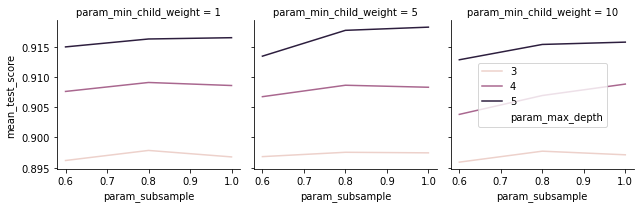

In [95]:
fig_xgb_reg = sns.FacetGrid(df_grid_search_xgb_reg, col="param_min_child_weight")
fig_xgb_reg.map(sns.lineplot, "param_subsample", "mean_test_score", "param_max_depth")
plt.plot([], [], ' ', label="param_max_depth")
plt.legend()
plt.show()

In [96]:
grid_search_xgb_reg.score(X_test, y_test)

0.8103144834477073

RMSE: 0.41179710113879536


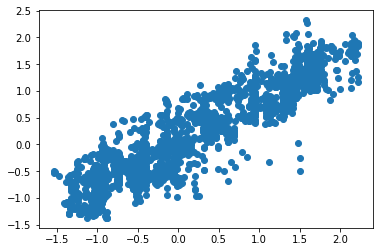

In [97]:
plot_test(grid_search_xgb_reg, X_test, y_test)